# Projeto F1

## Importando os Dados e filtrando as Poles

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 1000)

In [68]:
qualificacao = pd.read_csv('Dados F1/qualifying.csv')
corridas = pd.read_csv('Dados F1/races.csv')

pole_position = qualificacao.position == 1
poles = qualificacao[pole_position]
#poles.set_index('raceId', inplace = True)
poles

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
22,23,19,13,6,2,1,1:35.347,1:34.412,1:35.748
44,45,20,9,2,4,1,1:32.893,1:31.745,1:33.096
66,67,21,8,6,1,1,1:20.701,1:20.784,1:21.813
88,89,22,13,6,2,1,1:25.994,1:26.192,1:27.617
108,109,23,13,6,2,1,1:15.190,1:15.110,1:15.787
128,129,24,1,1,22,1,1:16.909,1:17.034,1:17.886
148,149,25,8,6,1,1,1:15.133,1:15.161,1:16.449
168,169,26,5,1,23,1,1:19.957,1:19.597,1:21.049
188,189,27,1,1,22,1,1:15.218,1:14.603,1:15.666


## Selecionando somente o Bahrein

In [5]:
corridas.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [48]:
poles_bahrein = corridas.query('circuitId == 3').set_index('raceId').join(poles)
poles_bahrein = poles_bahrein.loc[:, ['year', 'q3']]
poles_bahrein.dropna(subset = ['q3'], inplace = True)
poles_bahrein = poles_bahrein[poles_bahrein.q3 != '\\N']
poles_bahrein.q3 = pd.to_datetime(poles_bahrein.q3, format = '%M:%S.%f', errors = 'coerce')
poles_bahrein

,year,q3
raceId,,
4,2009,1900-01-01 00:01:33.431
20,2008,1900-01-01 00:01:33.096
38,2007,1900-01-01 00:01:32.652
53,2006,1900-01-01 00:01:31.431
337,2010,1900-01-01 00:01:54.101
863,2012,1900-01-01 00:01:32.422
883,2013,1900-01-01 00:01:32.330
902,2014,1900-01-01 00:01:33.185
929,2015,1900-01-01 00:01:32.571


DataError: No numeric types to aggregate

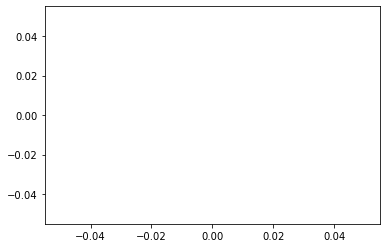

In [51]:
sns.lineplot(x = 'year', y = 'q3', data = poles_bahrein)

In [ ]:
tempo_das_poles_do_bahrein = poles_do_bahrein.loc[:,['q3']]
tempo_das_poles_do_bahrein

In [ ]:
tempo_das_poles_do_bahrein.index = range(tempo_das_poles_do_bahrein.shape[0])
tempo_das_poles_do_bahrein

In [ ]:
datas_bahrein = [2009,
                2008,
                2007,
                2006,
                2005,
                2004,
                2010,
                2012,
                2013,
                2014,
                2015,
                2016,
                2017,
                2018,
                2019]
datas_bahrein = pd.DataFrame(datas_bahrein)
datas_bahrein.columns = ['ano']
datas_bahrein

In [ ]:
tempo_mais_datas = pd.concat([tempo_das_poles_do_bahrein, datas_bahrein], axis = 1, ignore_index = True)
tempo_mais_datas
tempo_mais_datas.columns = ['q3', 'ano']
certo = tempo_mais_datas
certo

### Selecionando os dados corretos para o gráfico e traçando o gráfico

In [52]:
certinho = certo['ano'] >= 2012
certinho

NameError: name 'certo' is not defined

In [53]:
#agora_vai = certo[certinho]

#tempo = list(agora_vai.q3)
#data = list(agora_vai.ano)
#print(tempo, data)

tempo = [60 + 32.422, 60 + 32.330, 60 + 33.185, 60 + 32.571, 60 + 29.493, 60 + 28.769, 60 + 27.958, 60 + 27.866, 60 + 27.264]
data = [
                2012,
                2013,
                2014,
                2015,
                2016,
                2017,
                2018,
                2019, 
       2020]

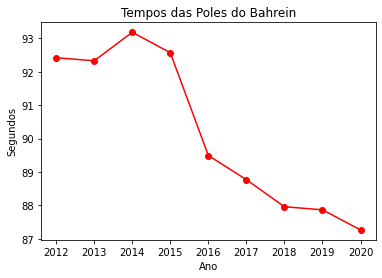

In [54]:
plt.plot(data, tempo, marker = 'o', color = 'red')
plt.title('Tempos das Poles do Bahrein')
plt.xlabel('Ano')
plt.ylabel('Segundos')
plt.show()

In [55]:
corridas.head(10)

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
5,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...
6,7,2009,7,5,Turkish Grand Prix,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...
7,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...
8,9,2009,9,20,German Grand Prix,2009-07-12,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...
9,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...


## Selecionando somente Mônaco e juntando com as Poles

In [56]:
ids_monaco = corridas.query('circuitId == 6')
ids_monaco.shape

(66, 8)

In [57]:
monaco_ids_e_data = ids_monaco.loc[:, ['raceId', 'year']]

monaco_ids_e_data.set_index('raceId', inplace = True)

In [58]:
monaco_poles = monaco_ids_e_data.join(poles.set_index('raceId'))
monaco_poles

KeyError: "None of ['raceId'] are in the columns"

In [59]:
monaco_poles.shape

NameError: name 'monaco_poles' is not defined

## Limpando o DataFrame

In [60]:
monaco_poles.dropna(subset = ['q3'], inplace = True)

NameError: name 'monaco_poles' is not defined

In [61]:
monaco_poles

NameError: name 'monaco_poles' is not defined

In [62]:
selecao = monaco_poles.q3 != '\\N'

NameError: name 'monaco_poles' is not defined

In [63]:
monaco_poles = monaco_poles[selecao]

NameError: name 'monaco_poles' is not defined

In [64]:
monaco_poles

NameError: name 'monaco_poles' is not defined

In [ ]:
monaco_poles.sort_values(by = 'year', inplace = True)

In [65]:
monaco_poles

NameError: name 'monaco_poles' is not defined

## Selecionando os dados e traçando o Gráfico

In [66]:
monaco_poles.q3 = pd.to_datetime(monaco_poles.q3, unit = 'm{}')

NameError: name 'monaco_poles' is not defined

NameError: name 'anos_monaco' is not defined

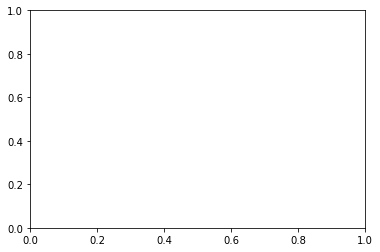

In [67]:
grafico_monaco = plt.figure()
g = grafico_monaco.add_subplot(1, 1, 1)

g.plot(anos_monaco, tempo_monaco, marker = 'o', color = 'green')
g.set_title('Tempos do Q3 em Mônaco ao longo dos anos')
g.set_xlabel('Anos')
g.set_ylabel('Tempo em segundos')

## Selecionando Somente o Brasil e limpando o DataFrame

In [ ]:
bresil = corridas.query('name == "Brazilian Grand Prix"')

In [ ]:
bresil = bresil.loc[:,['year', 'raceId']]
bresil

In [ ]:
bresil.set_index('raceId', inplace = True)

In [ ]:
bresil = bresil.join(poles)

In [ ]:
bresil.dropna(subset = ['q3'], inplace = True)

In [ ]:
bresil

In [ ]:
selecao = bresil.q3 != '\\N'

In [ ]:
bresil = bresil[selecao]

In [ ]:
bresil.sort_values(by = 'year', inplace = True)

In [ ]:
bresil

### Selecionando os dados e traçando o Gráfico

In [ ]:
anos_bresil = list(bresil.year)
tempo_bresil = list(bresil.q3)

In [ ]:
tempo_bresil

In [ ]:
tempo_bresil = [60 + 10.680,
 60 + 11.931,
 60 + 12.368,
 60 + 19.576,
 60 + 14.470,
 60 + 11.918,
 60 + 12.458,
 60 + 26.479,
 60 + 10.023,
 60 + 11.282,
 60 + 10.736,
 60 + 08.322,
 60 + 07.281,
 60 + 07.508]

In [ ]:
g_bresil = plt.figure()
g1 = g_bresil.add_subplot(1, 1, 1)

g1.plot(anos_bresil, tempo_bresil, marker = 'o', color = 'blue')
g1.set_title('Variação do Tempo do Q3 no Brasil ao longo dos anos')
g1.set_xlabel('Anos')
g1.set_ylabel('Tempo em segundos')